<a href="https://www.kaggle.com/code/dimasprayoga/credit-card-fraud-detection-mlg-ulb?scriptVersionId=258031323" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Data Understanding

# Import Library & Load Dataset

In [2]:
# Load dataset
credit_card = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

# Melihat 5 baris pertama
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Informasi tipe data & jumlah non-null
credit_card.info()

# Dimensi dataset
print("Jumlah baris & kolom:", credit_card.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Statistik deskriptif
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Cek distribusi label 'Class'
print("\nDistribusi Kelas (0 = Non-Fraud, 1 = Fraud):")
print(credit_card['Class'].value_counts())


Distribusi Kelas (0 = Non-Fraud, 1 = Fraud):
Class
0    284315
1       492
Name: count, dtype: int64


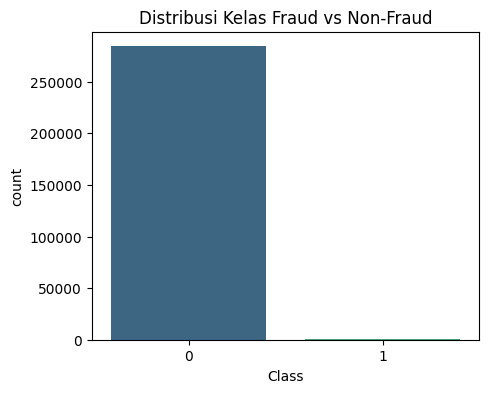

In [6]:
# Visualisasi distribusi kelas
plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=credit_card, palette='viridis')
plt.title('Distribusi Kelas Fraud vs Non-Fraud')
plt.show()

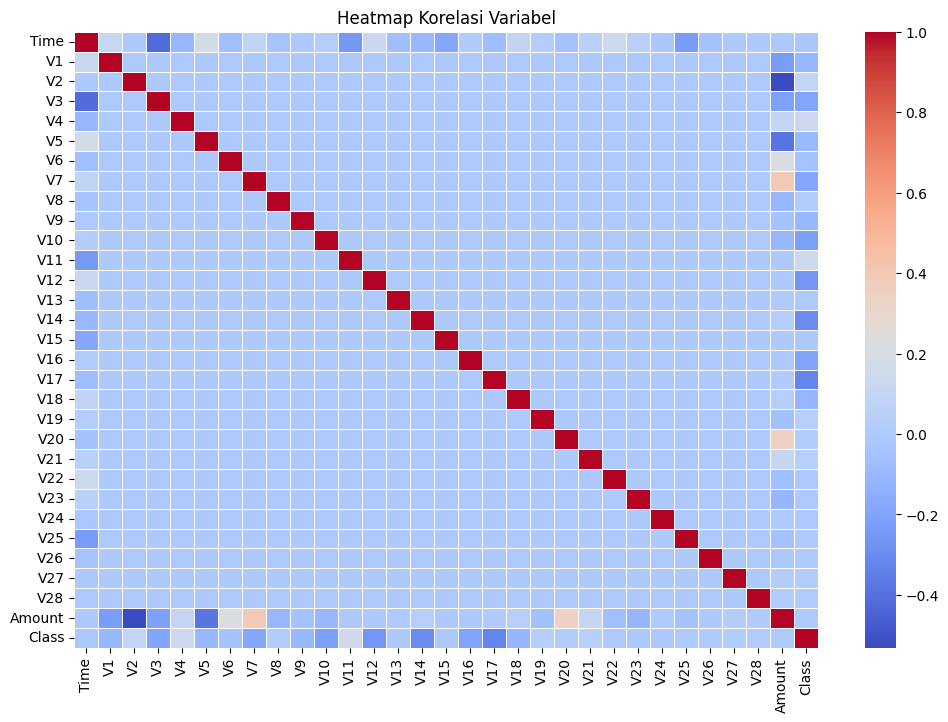

In [7]:
# Cek korelasi antar variabel
plt.figure(figsize=(12,8))
sns.heatmap(credit_card.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Variabel")
plt.show()

# Data Cleaning

In [8]:
# Cek missing values
print(credit_card.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
# Hapus duplikat
credit_card.drop_duplicates(inplace=True)

In [10]:
# Validasi kolom Amount & Time
print("Nilai minimum Amount:", credit_card['Amount'].min())
print("Nilai minimum Time:", credit_card['Time'].min())

Nilai minimum Amount: 0.0
Nilai minimum Time: 0.0


In [11]:
#  Memastikan Class hanya 0 & 1
print("Unique Class:", credit_card['Class'].unique())

Unique Class: [0 1]


In [12]:
credit_card.to_excel("creditcard.xlsx", index=False)

# EDA (Exploratory Data Analysis)

# Besar Tingkat Fraud Saat Ini

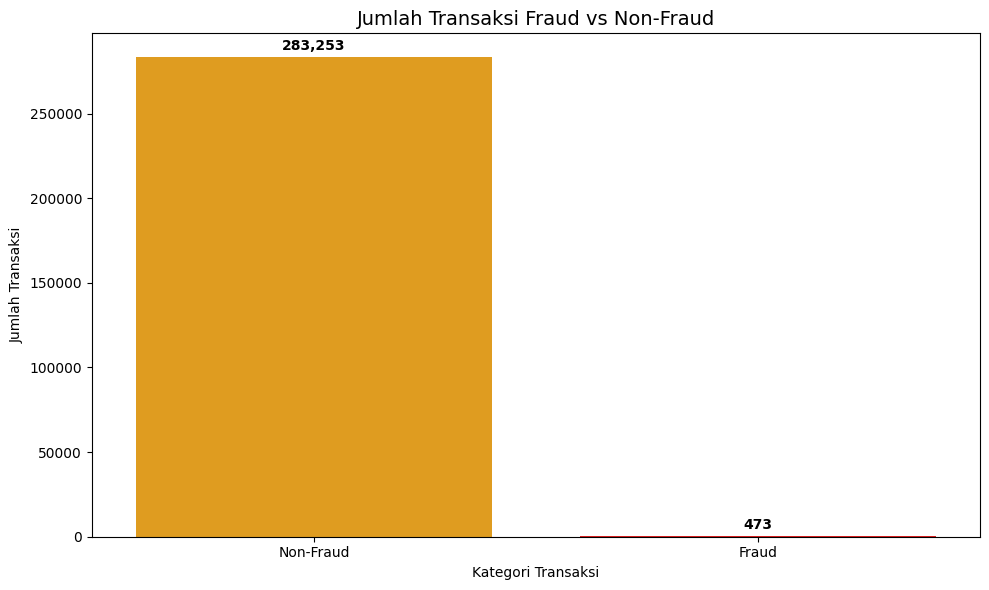

In [13]:
# Hitung jumlah transaksi fraud vs non-fraud
fraud_count = credit_card['Class'].value_counts().reset_index()
fraud_count.columns = ['Class', 'Jumlah Transaksi']

# Ubah label class agar lebih mudah dibaca
fraud_count['Class'] = fraud_count['Class'].map({0: 'Non-Fraud', 1: 'Fraud'})

# Visualisasi Bar Chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Class', 
    y='Jumlah Transaksi', 
    data=fraud_count, 
    palette=['orange', 'red']
)

# Tambahkan anotasi nilai di atas bar
for p in ax.patches:
    ax.annotate(
        format(int(p.get_height()), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 8),  # Jarak teks dari bar
        textcoords='offset points',
        fontsize=10, weight='bold'
    )

plt.title("Jumlah Transaksi Fraud vs Non-Fraud", fontsize=14)
plt.xlabel("Kategori Transaksi")
plt.ylabel("Jumlah Transaksi")
plt.tight_layout()
plt.show()


# Fraud paling sering terjadi

Top jam dengan jumlah fraud terbanyak:
Hour
11    53
2     48
18    28
dtype: int64


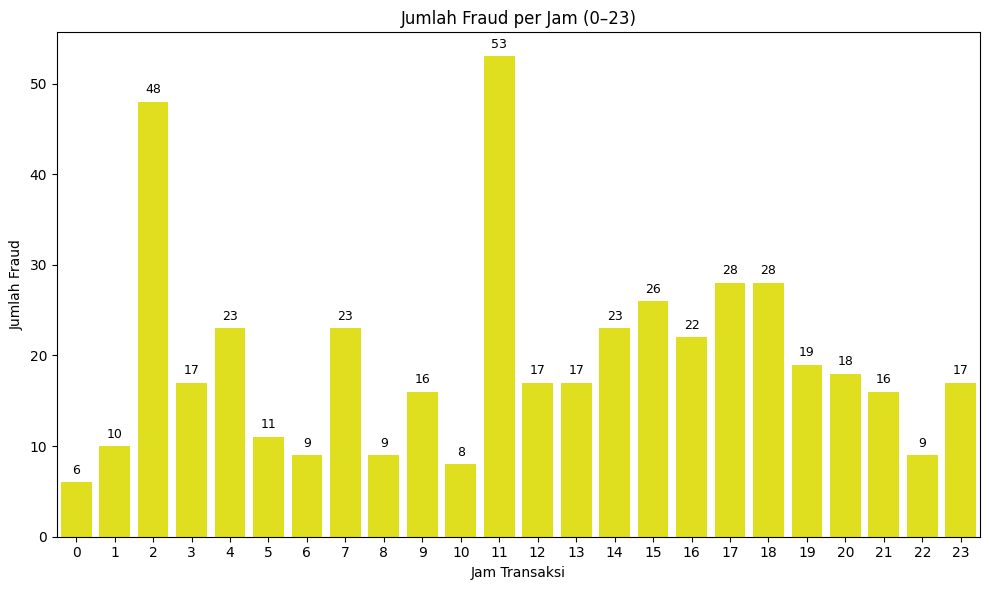

In [14]:
# Pastikan kolom Hour ada (dihitung dari Time dalam detik)
credit_card['Hour'] = (credit_card['Time'] // 3600) % 24

# Jumlah fraud per jam
fraud_by_hour = (
    credit_card[credit_card['Class'] == 1]
    .groupby('Hour')
    .size()
    .reindex(range(24), fill_value=0)      # jam 0-23 selalu ada
)

# Tampilkan 3 jam teratas
print("Top jam dengan jumlah fraud terbanyak:")
print(fraud_by_hour.sort_values(ascending=False).head(3))

# Plot bar (ukuran kecil, aman untuk Kaggle)
plt.figure(figsize=(10,6))
ax = sns.barplot(x=fraud_by_hour.index, y=fraud_by_hour.values, color='yellow')

# Anotasi nilai di atas bar
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', xytext=(0,4), textcoords='offset points', fontsize=9)

plt.title("Jumlah Fraud per Jam (0–23)")
plt.xlabel("Jam Transaksi")
plt.ylabel("Jumlah Fraud")
plt.tight_layout()
plt.show()

# Perbedaan distribusi fitur antara fraud dan non-fraud

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


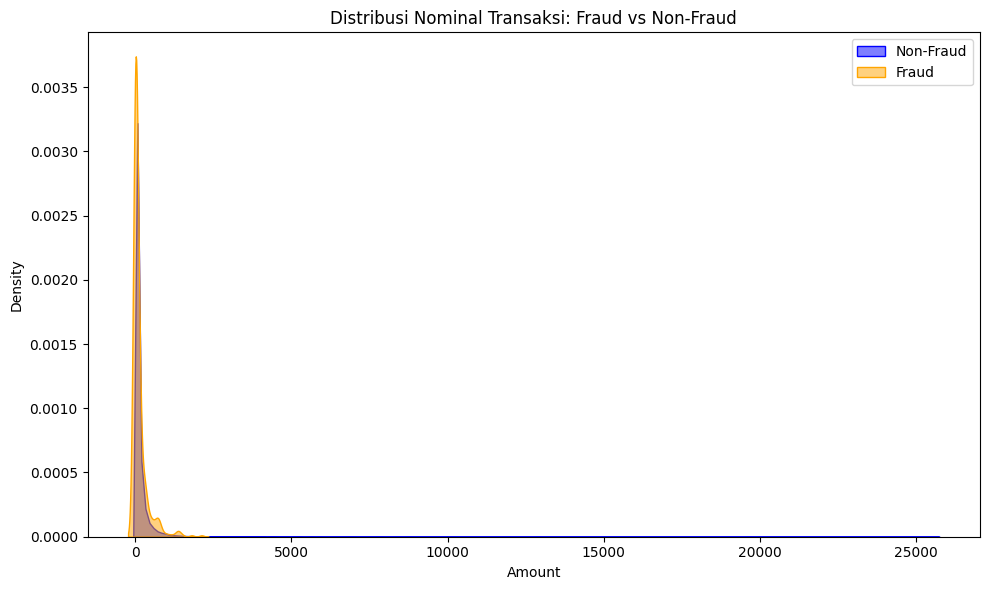

In [15]:
# Contoh untuk fitur 'Amount'
plt.figure(figsize=(10,6))
sns.kdeplot(
    data=credit_card[credit_card['Class'] == 0]['Amount'], 
    label='Non-Fraud', 
    fill=True, 
    alpha=0.5, 
    color='blue'
)
sns.kdeplot(
    data=credit_card[credit_card['Class'] == 1]['Amount'], 
    label='Fraud', 
    fill=True, 
    alpha=0.5, 
    color='orange'
)
plt.title("Distribusi Nominal Transaksi: Fraud vs Non-Fraud")
plt.xlabel("Amount")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


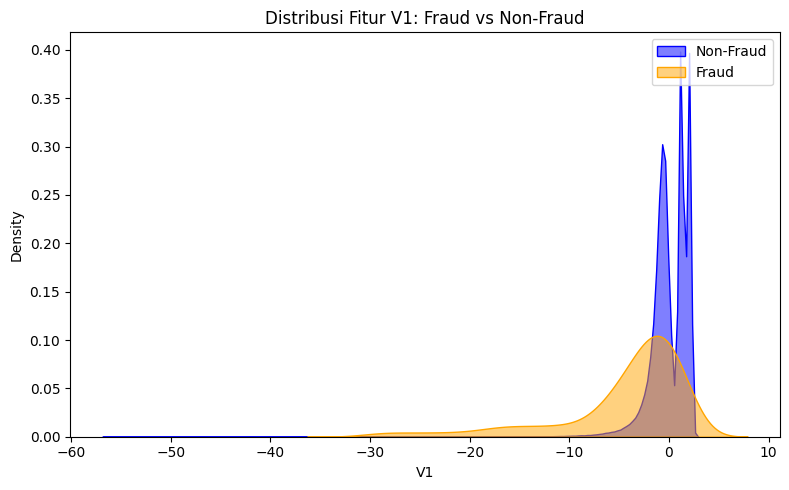

In [16]:
plt.figure(figsize=(8,5))
sns.kdeplot(
    data=credit_card[credit_card['Class'] == 0]['V1'], 
    label='Non-Fraud', 
    fill=True, 
    alpha=0.5, 
    color='blue'
)
sns.kdeplot(
    data=credit_card[credit_card['Class'] == 1]['V1'], 
    label='Fraud', 
    fill=True, 
    alpha=0.5, 
    color='orange'
)
plt.title("Distribusi Fitur V1: Fraud vs Non-Fraud")
plt.xlabel("V1")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# Modelling / Analisis Lanjutan

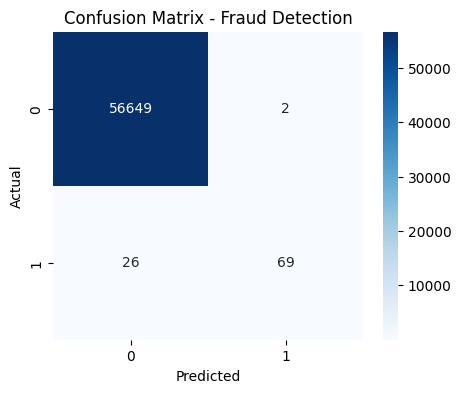

In [17]:
# Memisahkan fitur & target
X = credit_card.drop('Class', axis=1)
y = credit_card['Class']

# Split train-test (stratify agar proporsi fraud terjaga)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Fraud Detection')
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.73      0.83        95

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.92     56746
weighted avg       1.00      1.00      1.00     56746



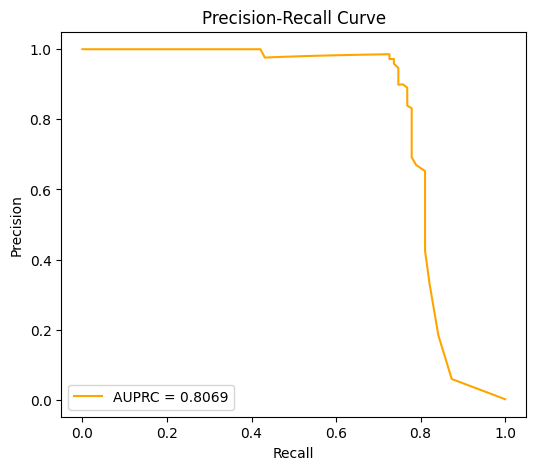

In [18]:
# Classification Report
print(classification_report(y_test, y_pred))

# Precision-Recall Curve (AUPRC)
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='orange', label=f'AUPRC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

1️⃣ **Confusion Matrix**

True Negative (TN) = 56,649 → Transaksi non-fraud yang diprediksi benar.

False Positive (FP) = 2 → Transaksi non-fraud yang salah diprediksi sebagai fraud.

False Negative (FN) = 26 → Fraud yang lolos deteksi (missed fraud).

True Positive (TP) = 69 → Fraud yang terdeteksi benar.

Interpretasi:
Model sangat kuat pada prediksi non-fraud (TN tinggi, FP rendah), tapi FN masih cukup signifikan. Dalam konteks fraud detection, FN adalah risiko besar karena berarti penipuan tidak tertangkap.

2️⃣ **Precision-Recall Curve (PR Curve)**

Fraud (kelas 1):

Precision = 0.97 → 97% dari prediksi fraud memang benar fraud.

Recall = 0.73 → 73% fraud berhasil terdeteksi.

F1-score = 0.83 → Cukup baik, ada ruang perbaikan.

Accuracy = 99.95%, tapi ini bias karena data imbalanced.

Interpretasi:
Model seimbang dalam precision dan recall, namun recall untuk fraud masih bisa ditingkatkan agar lebih sedikit fraud yang lolos.

3️⃣ **Precision-Recall Curve (PR Curve)**

AUPRC = 0.8069 → Cukup tinggi untuk data imbalanced.

Precision tetap >0.9 hingga recall mendekati 0.8.

Setelah recall >0.8, precision turun → risiko false positive meningkat.

Interpretasi:
PR Curve menunjukkan model masih efektif menangkap fraud tanpa terlalu banyak kesalahan, tapi threshold harus diatur hati-hati untuk menjaga keseimbangan antara catch rate dan false alarms.

# Complex Summary

* **Background**: This project aims to identify fraudulent credit card transactions to reduce potential financial losses and maintain customer trust. The dataset is sourced from MLG ULB with 284,807 transactions, of which 492 are fraudulent (~0.172%), making the dataset highly imbalanced.

* **Initial Data Analysis**: Features V1–V28 are PCA results, with the time and amount remaining the original values. The target label, Class, is 1 for fraud and 0 for non-fraud. The skewed class distribution requires specialized approaches such as resampling or cost-sensitive learning.

* **EDA Key**:

1. **Fraud Rate**: Fraud is very rare, so traditional accuracy is irrelevant—AUPRC or F1-Score metrics are needed.

2. **Transaction Amount Pattern**: Fraud often occurs at certain transaction values (either high or low outliers).

3. **Time Patterns**: Fraud tends to occur during specific times, indicating potential coordinated activity.

4. **Distribution Features**: Significant differences are observed in several PCA components between Fraud and Non-Fraud.

//

* **Latar Belakang**: Proyek ini bertujuan mengidentifikasi transaksi kartu kredit yang bersifat fraud untuk mengurangi potensi kerugian finansial dan menjaga kepercayaan nasabah. Dataset bersumber dari MLG ULB dengan 284.807 transaksi, 492 di antaranya adalah fraud (~0,172%), sehingga dataset sangat tidak seimbang.

* **Analisis Data Awal**: Fitur V1–V28 merupakan hasil PCA, sementara Time dan Amount tetap asli. Label target Class bernilai 1 untuk fraud dan 0 untuk non-fraud. Distribusi kelas yang timpang memerlukan pendekatan khusus seperti resampling atau cost-sensitive learning.

* **EDA Kunci**:

1. **Tingkat Fraud**: Fraud sangat jarang terjadi, sehingga akurasi biasa tidak relevan—perlu metrik AUPRC atau F1-Score.

2. **Pola Nominal Transaksi**: Fraud sering muncul pada nilai transaksi tertentu (outlier tinggi maupun rendah).

3. **Pola Waktu**: Fraud cenderung terkonsentrasi pada jam-jam spesifik, menunjukkan potensi aktivitas terkoordinasi.

4. **Distribusi Fitur**: Perbedaan signifikan terlihat pada beberapa komponen PCA antara fraud dan non-fraud.

# Context – Insights – Recommendations

1. **Context**

Credit card companies need to detect fraudulent transactions quickly to avoid financial losses and maintain customer trust. This dataset includes 284,807 transactions over two days, with only 492 transactions identified as fraudulent (0.172%). This data is highly imbalanced, requiring a specialized approach to identify significant patterns.

2. **Insights**

* **Current Fraud Rate**
Fraud occurs in <0.2% of all transactions, indicating rare but high-risk cases. Traditional accuracy is potentially misleading; metrics such as Precision-Recall AUC or F1-Score are more appropriate.

* **Most Frequent Fraud**
Fraud is not evenly distributed throughout time, but is concentrated at certain times. This indicates a temporal pattern that can be exploited to improve real-time monitoring.

* **Feature Distribution Differences**
Several PCA variables (e.g., V4, V11, V14) show significant distribution differences between fraudulent and non-fraudulent transactions, making them strong candidates for feature selection in detection models.

3. **Recommendations**

* **Vulnerable Time Monitoring**
Tighten monitoring and increase the sensitivity of the detection system during times when fraud is most common.

* **Feature Engineering**
Focus model development on features that show significant distribution differences between fraudulent and non-fraudulent transactions to improve detection accuracy.

* **Imbalanced Data Handling**
Apply techniques such as SMOTE, undersampling, or cost-sensitive learning to address class imbalance in modeling.

* **Real-Time Alert System**
Integrate the time patterns and amounts of risky transactions into the early warning system for faster investigative responses.

//


1. **Context**

Perusahaan kartu kredit perlu mendeteksi transaksi penipuan (fraud) secara cepat untuk menghindari kerugian finansial dan menjaga kepercayaan pelanggan. Dataset ini mencakup 284.807 transaksi dalam 2 hari, dengan hanya 492 transaksi yang teridentifikasi sebagai fraud (0,172%). Data ini sangat tidak seimbang (imbalanced), sehingga analisis memerlukan pendekatan khusus untuk mengidentifikasi pola yang signifikan.

2. **Insights**

* **Besar Tingkat Fraud Saat Ini**
Fraud terjadi pada <0,2% dari seluruh transaksi, mengindikasikan kasus jarang tetapi berisiko tinggi. Akurasi biasa berpotensi menyesatkan; metrik seperti Precision-Recall AUC atau F1-Score lebih tepat digunakan.

* **Fraud Paling Sering Terjadi**
Fraud tidak tersebar merata sepanjang waktu, tetapi terkonsentrasi pada jam-jam tertentu. Hal ini mengindikasikan adanya pola waktu yang dapat dimanfaatkan untuk meningkatkan real-time monitoring.

* **Perbedaan Distribusi Fitur**
Beberapa variabel hasil PCA (contoh: V4, V11, V14) menunjukkan perbedaan distribusi signifikan antara transaksi fraud dan non-fraud, menjadikannya kandidat kuat untuk feature selection dalam model deteksi.

3. **Recommendations**

* **Monitoring Waktu Rawan**
Perketat pengawasan dan tingkatkan sensitivitas sistem deteksi pada jam-jam di mana fraud paling sering terjadi.

* **Feature Engineering**
Fokuskan pengembangan model pada fitur yang menunjukkan perbedaan distribusi signifikan antara fraud dan non-fraud untuk meningkatkan akurasi deteksi.

* **Imbalanced Data Handling**
Terapkan teknik seperti SMOTE, undersampling, atau cost-sensitive learning untuk mengatasi ketidakseimbangan kelas dalam pemodelan.

* **Real-Time Alert System**
Integrasikan pola waktu & nominal transaksi berisiko ke dalam sistem peringatan dini agar respon investigasi lebih cepat.
